Here we test random subset of genes out of full size Aging List. We could take all genes in mouse genome database although, but decided to limit to the AgingList for a reason, that the list is already a quater of all known genes (mostly protein-coding), and also this list by large is irreproducible, meaning quite random by nature. So, to our opinion, this is more relevant to our comparison with really aging lists, each of them is better than random. (This is what we will try to prove with these simulations).

The script begins with the import of the nesessary libraries and loading the Aging List file

In [1]:
import matplotlib.pyplot as plt, random

"input file with precalculated signature gene list"
mdir="/Users/Art/Drive/PhD/Experiments/Aging Signature/000_FINAL/00_sourceFiles/"

f_in=open(mdir+ "01_Aging_List_REAN.txt","r")
lines=f_in.readlines()
f_in.close()
names, freqs=[],[]
for line in lines[1:]:
    items=line.rstrip().split("\t")
    names.append(items[0])
    freqs.append(int(items[1]))
print("names", len(names))
print("freqs", len(freqs))
print("Max freqs", max(freqs))

names 5443
freqs 5443
Max freqs 12


We can check frequency group sizes to determine where is our Aging Signature. If you remember it should be around top 5% of all genes.

In [2]:
mymax=10
print("ID\tSetSize\t%")
for i in range(mymax+1):
    setsize=len([x for x in freqs if x>i])
    print(i+1, setsize, round(setsize*100/len(freqs),3), sep="\t")

ID	SetSize	%
1	5443	100.0
2	1132	20.797
3	434	7.974
4	222	4.079
5	122	2.241
6	60	1.102
7	34	0.625
8	23	0.423
9	8	0.147
10	5	0.092
11	3	0.055


Threshold for the AgingSignature can be set on either >2 or >3, which is a bit more or a bit less than 5%. 

For simulation we need only citation frequencies of genes, no gene names.
For random subset we define it between 100 and 500, approximately the size range for the most of the gene sets.
The maximally scoring subset is the subset of genes with citation scores above 1 (note that we give add all frequencis if they are above 1, and penalise score if 1. Let's start with it and find the enrichment score and the Rank score

In [3]:
max_set=[x for x in freqs if x>1]
print(len(max_set))
#the Rank score is simply a sum of all scores
print("Rank Score", sum(max_set))


1132
Rank Score 3176


we can also check the Rank Score for AgingSignature only

In [4]:
age_set=[x for x in freqs if x>2]
print(len(age_set))
#the Rank score is simply a sum of all scores
print("Rank Score", sum(age_set))

434
Rank Score 1780


We can also calculate Enrichment Score. For this, we need to know total set AgingList size, size of the AgingSignature (at which we determine an enrichment score). Next for any set we have to know its own size and a size of gene list which overlaps with the Aging List

In [5]:
AL_size=len(freqs) #aging list size
AS_size=len(age_set) #Aging signature size, already calculated
mylist_size=313 #just decided
my_list_in_AS=313 #all genes are in AS, in other words I check the AS list for enrichment

expected=mylist_size*AS_size/AL_size
observed=my_list_in_AS

enrichment=observed-expected
print("Expected, Observed", int(expected), observed)
print("Enrichment", enrichment)


Expected, Observed 24 313
Enrichment 288.0428072753996


We can also calculate significance by Fisher exact test. Note we do not discuss applicability of the Fisher exact test for enrichment score. There is an ongoing discussion on this issue and serious disagreements in opinions. It is considered as acceptable option, however. 
Fo this test we need 4 values: number of genes in Aging list above and below selected threshold, and the same two values for any other set.

In [6]:
import scipy.stats as ss

my_list_size=100
#define size of the list overlapping with AS
my_list_in_AS=10

stats,p_val=ss.fisher_exact([[AS_size, AL_size-AS_size],
                         [my_list_in_AS, mylist_size-my_list_in_AS]])
print("Fisher exact", stats, p_val)
if p_val<0.05:
    print("Significant enrichment")
else:
    print("Not significant")

Fisher exact 2.625314434018766 0.0009939356897784748
Significant enrichment


Now we can run a random simulation to check the averages for both scores we have used.
Since most of the genes in the AgingList are by large irreproducible, it will be a good source for random selection.

In [16]:
"make random subset i times"
allscores=[]
for i in range(100):
    #make variavle length of the set size, as we have it in real data
    mylen=random.choice(range(200,400))
    my_selection=[]
    while len(my_selection)<mylen:
        #it is not ideal selection, which technically allows the same item twice, yet representative
        my_selection.append(random.choice(freqs))
    rank_score=0
    for value in my_selection:
        if value>1:
            rank_score+=value
        else:
            rank_score -= value
    allscores.append(rank_score)
print("All Rank Scores", min(allscores), max(allscores))

All Rank Scores -216 -59


We can also plot histogram of all scores

Text(0.5, 0, 'Rank_scores')

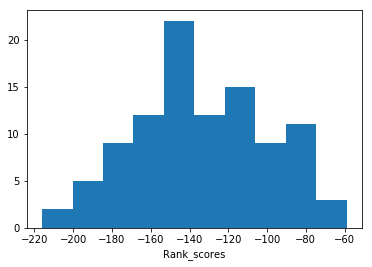

In [17]:
plt.hist(allscores)
plt.xlabel("Rank_scores")

You will likely see that Rank scores of random subsets are barely close to zero value, but all below it. It also means that our real sets of data are much better than random.

Next, we do similar procedure with Enrichment scores.

Text(0.5, 0, 'Enrich_scores')

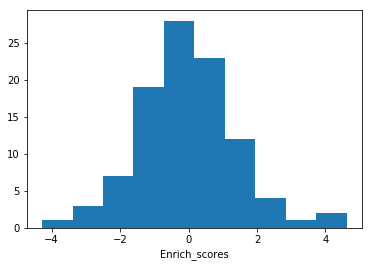

In [22]:
"make random subset i times"
top5=len([x for x in freqs if x>2]) #adjust if nesessary
enscores=[]
for i in range(100):
    #make variavle length of the set size, as we have it in real data
    mylen=random.choice(range(200,400))
    my_selection=[]
    while len(my_selection)<mylen:
        #it is not ideal selection, which technically allows the same item twice, yet representative
        my_selection.append(random.choice(freqs))

    "calculate enrichment score"
  #  print("i, observed, expected, EnScore, RankScore")
    expect=len(my_selection)*top5/len(freqs)
    observed=len([x for x in my_selection if x>2]) #threshold should be the same as for top5
    
    en_score=(observed-expect)*100/len(my_selection)
    enscores.append(en_score)
 #   print(i, mylen, expect, observed, en_score,rank_score, sep="\t")
plt.hist(enscores)
plt.xlabel("Enrich_scores")
#plt.show()

You will likely see that Enrichment scores peaked around zero value, as expected for the enrichment at random. Note that both scores used here are more a suggestion, rather than a final best measure of the scores. We do not pretend to the final solution. Everybody is welcome for further improvement.